# Show results

---

Show the results for all trained and tested models

## Setup

In [1]:
import json
from pathlib import Path

import IPython
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy.optimize import minimize_scalar
from sklearn.metrics import f1_score, classification_report
from tqdm.auto import tqdm

%run configurations-gen.ipynb

In [2]:
# Load test datasets
test_data_folder = data_folder + '/test'
test_dfs = {'serval': {}, 'pallas': {}}
for key in test_dfs:
    for path in Path(f"{test_data_folder}/{key}").glob(f"*.csv"):
        test_dfs[key][path.stem] = pd.read_csv(path, sep=';', index_col=0)
experiment_types = {
    'combined': ['single', 'double'],
    'single': ['single'],
    'double': ['double'],
}

In [3]:
df_classes = pd.read_csv(classes_model, sep=';')

### Function definitions

In [4]:
def generate_confusion_matrix(true_labels, predicted_logits, amt_of_labels, threshold):
    cm = np.zeros((amt_of_labels, amt_of_labels))
    true_labels = true_labels == 1.0
    predicted_labels = predicted_logits >= threshold
    
    for idx in range(len(predicted_labels)):
        true = true_labels[idx]
        pred = predicted_labels[idx]
        right = []
        wrong = []
        for label in [i for i, x in enumerate(pred) if x]:
            if true[label]:
                right += [label]
            else:
                wrong += [label]
        for label in right:
            cm[label, label] += 1
        wrong_predicted = [label for label in wrong if label not in right]
        wrong_truth = [label for label, val in enumerate(true_labels[idx]) if label not in right and val]
        for pred in wrong_predicted:
            for true in wrong_truth:
                cm[true, pred] += 1
    return cm

def plot_confusion_matrix(cm, labels):
    normalized = cm / cm.sum(axis=1, keepdims=True)

    plot_data = normalized
    text_data = cm

    # Plot confusion matrix
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    plt.title('Confusion matrix', fontsize='x-large')

    ax.imshow(plot_data, cmap='Oranges', vmin=0, vmax=2 * plot_data.max())

    # if normalize_labels:
    #     results = np.around(results, 4) * 100

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=40, rotation_mode='anchor', ha='right')
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels)

    for i, row in enumerate(text_data):
        max_val = max(row)
        for j, val in enumerate(row):
            if val == 0:
                continue
            stringrep = f'{int(val)}'
            if val == max_val:
                ax.text(j, i, stringrep, ha='center', weight='bold')
            else:
                ax.text(j, i, stringrep, ha='center')
    
    return fig, ax

def display_confusion_matrix(true_logits, predicted_logits, df_classes, opt_threshold):
    cm = generate_confusion_matrix(truth, predicted, len(df_classes), opt_threshold)
    plot_confusion_matrix(cm, df_classes.label)
    plt.show()

In [5]:
def get_predictions(input, threshold):
    return (np.squeeze(input) > threshold)*1

def fixed_f1_score(threshold, y_true, y_pred, average='micro'):
    return f1_score(y_true, get_predictions(y_pred, threshold=threshold), average=average)

def get_optimum_threshold(true_logits, predicted_logits):
    opt_threshold = minimize_scalar(lambda threshold: -fixed_f1_score(threshold, true_logits, predicted_logits), method='bounded', bounds=[0,1]).x
    return opt_threshold

## Present metrics

### No data augmentation (0)

#### combined

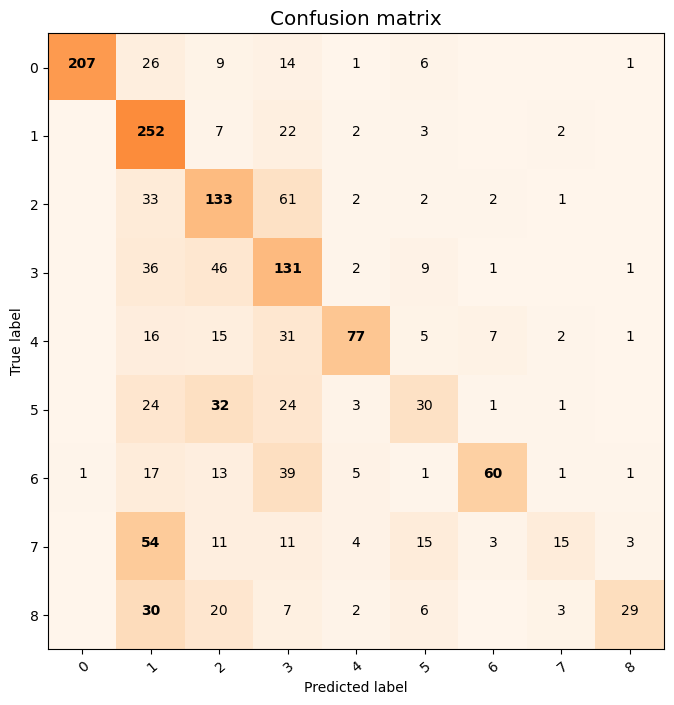

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       327
           1       0.64      0.80      0.71       314
           2       0.54      0.48      0.51       278
           3       0.48      0.51      0.49       259
           4       0.87      0.39      0.54       195
           5       0.52      0.16      0.25       184
           6       0.88      0.35      0.50       172
           7       0.65      0.09      0.16       162
           8       0.83      0.19      0.30       156

   micro avg       0.67      0.46      0.54      2047
   macro avg       0.71      0.40      0.47      2047
weighted avg       0.71      0.46      0.52      2047
 samples avg       0.66      0.54      0.58      2047



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### single

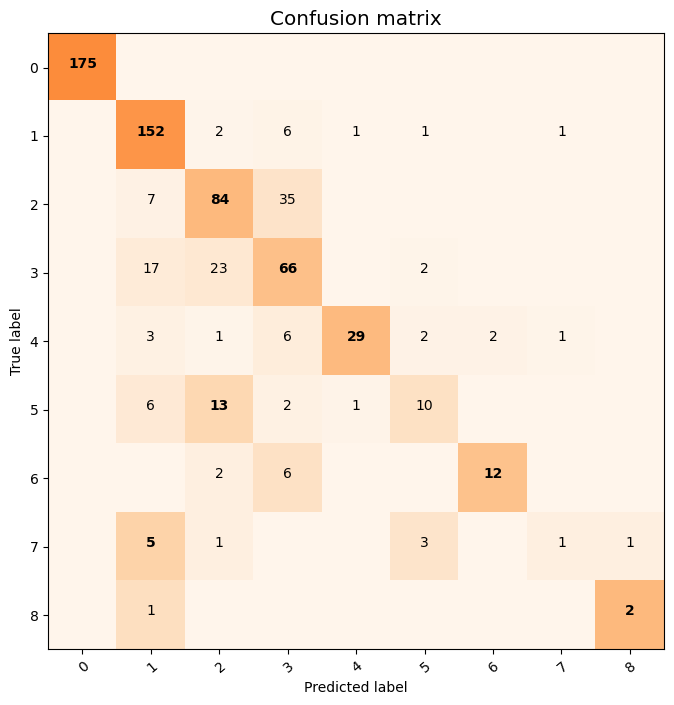

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       0.79      0.94      0.86       162
           2       0.61      0.67      0.64       126
           3       0.52      0.62      0.56       107
           4       0.94      0.67      0.78        43
           5       0.56      0.31      0.40        32
           6       0.86      0.60      0.71        20
           7       0.25      0.10      0.14        10
           8       0.50      0.50      0.50         4

   micro avg       0.76      0.78      0.77       679
   macro avg       0.67      0.60      0.62       679
weighted avg       0.76      0.78      0.76       679
 samples avg       0.77      0.78      0.77       679



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### double

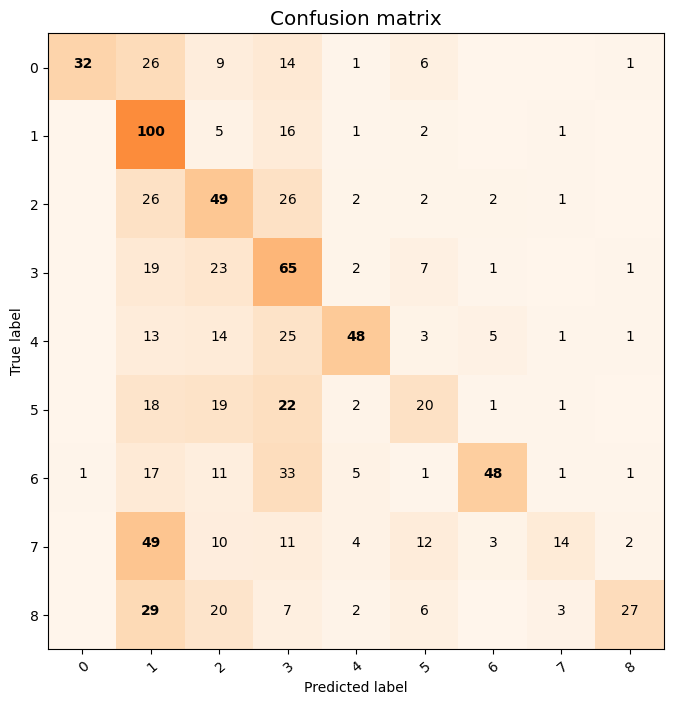

              precision    recall  f1-score   support

           0       0.97      0.21      0.35       152
           1       0.50      0.66      0.57       152
           2       0.45      0.32      0.38       152
           3       0.45      0.43      0.44       152
           4       0.83      0.32      0.46       152
           5       0.50      0.13      0.21       152
           6       0.89      0.32      0.47       152
           7       0.74      0.09      0.16       152
           8       0.87      0.18      0.30       152

   micro avg       0.59      0.29      0.39      1368
   macro avg       0.69      0.29      0.37      1368
weighted avg       0.69      0.29      0.37      1368
 samples avg       0.56      0.29      0.38      1368



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive data augmentation (1)

#### combined

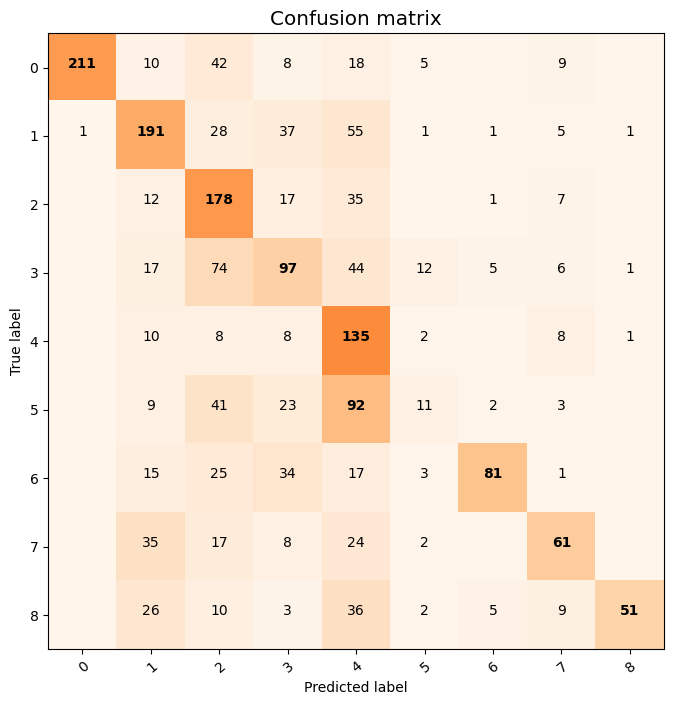

              precision    recall  f1-score   support

           0       1.00      0.65      0.78       327
           1       0.68      0.61      0.64       314
           2       0.45      0.64      0.53       278
           3       0.43      0.37      0.40       259
           4       0.33      0.69      0.44       195
           5       0.21      0.06      0.09       184
           6       0.87      0.47      0.61       172
           7       0.66      0.38      0.48       162
           8       0.93      0.33      0.48       156

   micro avg       0.56      0.50      0.53      2047
   macro avg       0.62      0.47      0.50      2047
weighted avg       0.63      0.50      0.52      2047
 samples avg       0.62      0.57      0.57      2047



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### single

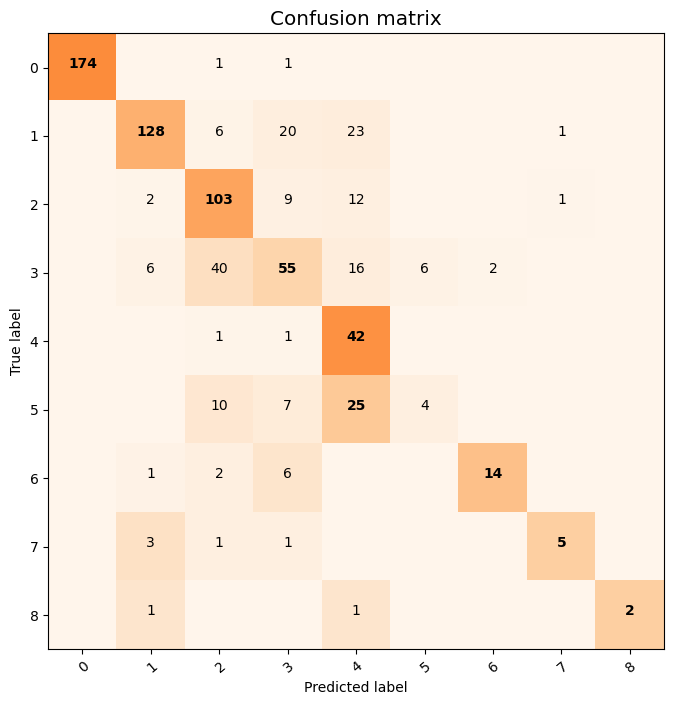

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       175
           1       0.86      0.79      0.82       162
           2       0.49      0.82      0.61       126
           3       0.43      0.51      0.47       107
           4       0.24      0.98      0.39        43
           5       0.14      0.12      0.13        32
           6       0.78      0.70      0.74        20
           7       0.71      0.50      0.59        10
           8       1.00      0.50      0.67         4

   micro avg       0.59      0.78      0.67       679
   macro avg       0.63      0.66      0.60       679
weighted avg       0.68      0.78      0.71       679
 samples avg       0.68      0.78      0.71       679



#### double

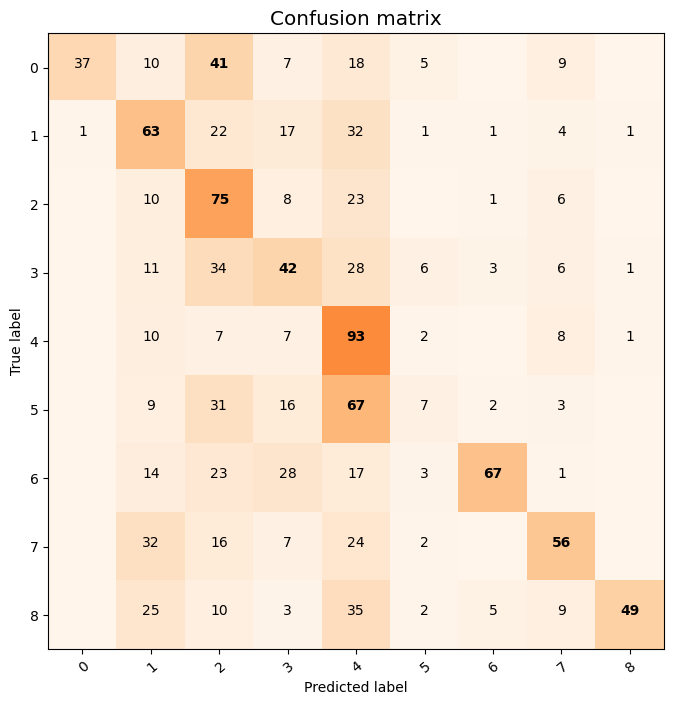

              precision    recall  f1-score   support

           0       0.97      0.24      0.39       152
           1       0.47      0.41      0.44       152
           2       0.41      0.49      0.45       152
           3       0.42      0.28      0.33       152
           4       0.38      0.61      0.47       152
           5       0.30      0.05      0.08       152
           6       0.89      0.44      0.59       152
           7       0.66      0.37      0.47       152
           8       0.92      0.32      0.48       152

   micro avg       0.53      0.36      0.43      1368
   macro avg       0.61      0.36      0.41      1368
weighted avg       0.61      0.36      0.41      1368
 samples avg       0.57      0.36      0.43      1368



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Serval cross-label sample combining (2)

#### combined

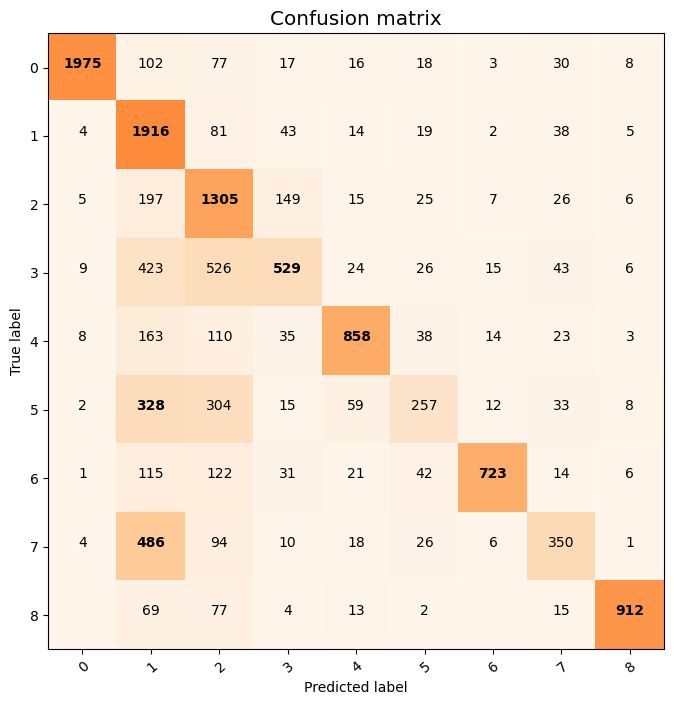

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      2430
           1       0.54      0.82      0.66      2325
           2       0.52      0.63      0.57      2070
           3       0.62      0.27      0.38      1932
           4       0.83      0.60      0.70      1437
           5       0.59      0.19      0.28      1377
           6       0.91      0.58      0.71      1254
           7       0.55      0.28      0.37      1233
           8       0.92      0.79      0.85      1158

   micro avg       0.69      0.58      0.63     15216
   macro avg       0.72      0.55      0.60     15216
weighted avg       0.71      0.58      0.61     15216
 samples avg       0.70      0.63      0.64     15216



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### single

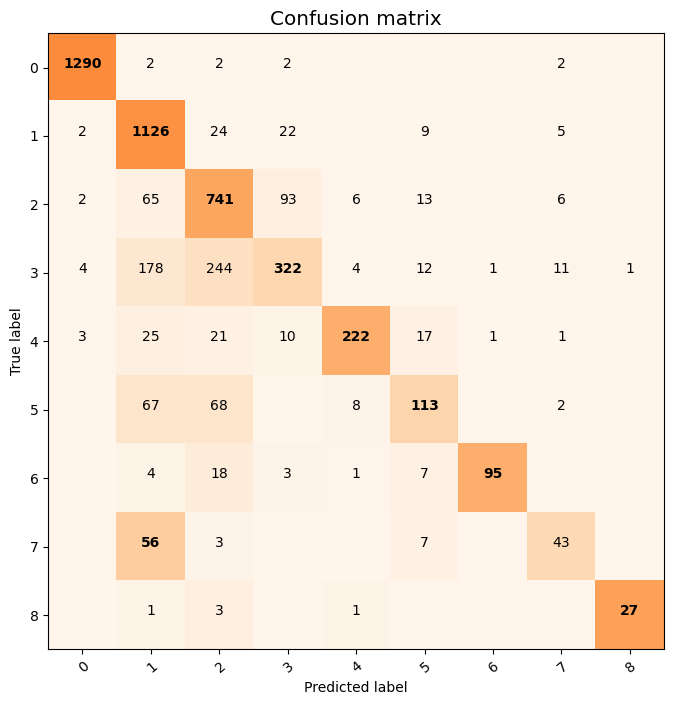

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1302
           1       0.64      0.94      0.77      1197
           2       0.59      0.79      0.67       942
           3       0.62      0.40      0.49       804
           4       0.83      0.72      0.77       309
           5       0.55      0.45      0.50       249
           6       0.88      0.75      0.81       126
           7       0.28      0.41      0.33       105
           8       0.42      0.90      0.57        30

   micro avg       0.70      0.79      0.74      5064
   macro avg       0.64      0.71      0.65      5064
weighted avg       0.72      0.79      0.74      5064
 samples avg       0.72      0.79      0.74      5064



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### double

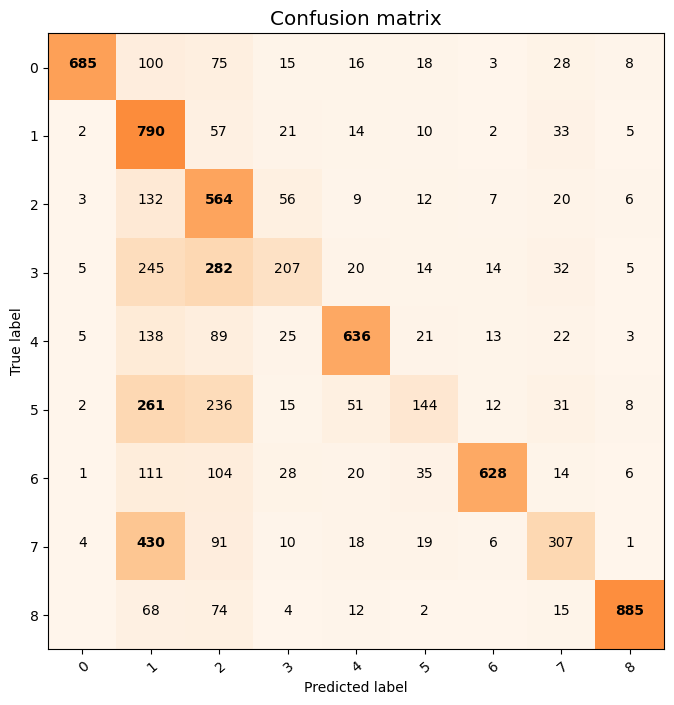

              precision    recall  f1-score   support

           0       0.97      0.61      0.75      1128
           1       0.44      0.70      0.54      1128
           2       0.45      0.50      0.47      1128
           3       0.62      0.18      0.28      1128
           4       0.83      0.56      0.67      1128
           5       0.62      0.13      0.21      1128
           6       0.91      0.56      0.69      1128
           7       0.63      0.27      0.38      1128
           8       0.95      0.78      0.86      1128

   micro avg       0.68      0.48      0.56     10152
   macro avg       0.71      0.48      0.54     10152
weighted avg       0.71      0.48      0.54     10152
 samples avg       0.68      0.48      0.54     10152



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Improved sample combining (3)

#### combined

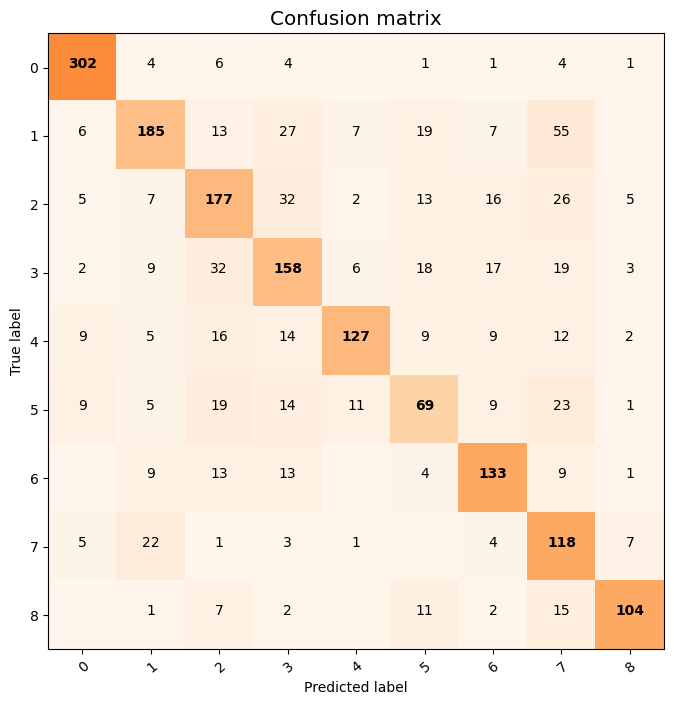

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       327
           1       0.77      0.59      0.67       314
           2       0.57      0.64      0.60       278
           3       0.48      0.61      0.54       259
           4       0.80      0.65      0.72       195
           5       0.38      0.38      0.38       184
           6       0.54      0.77      0.64       172
           7       0.34      0.73      0.46       162
           8       0.83      0.67      0.74       156

   micro avg       0.60      0.67      0.63      2047
   macro avg       0.61      0.66      0.62      2047
weighted avg       0.63      0.67      0.64      2047
 samples avg       0.66      0.72      0.65      2047



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### single

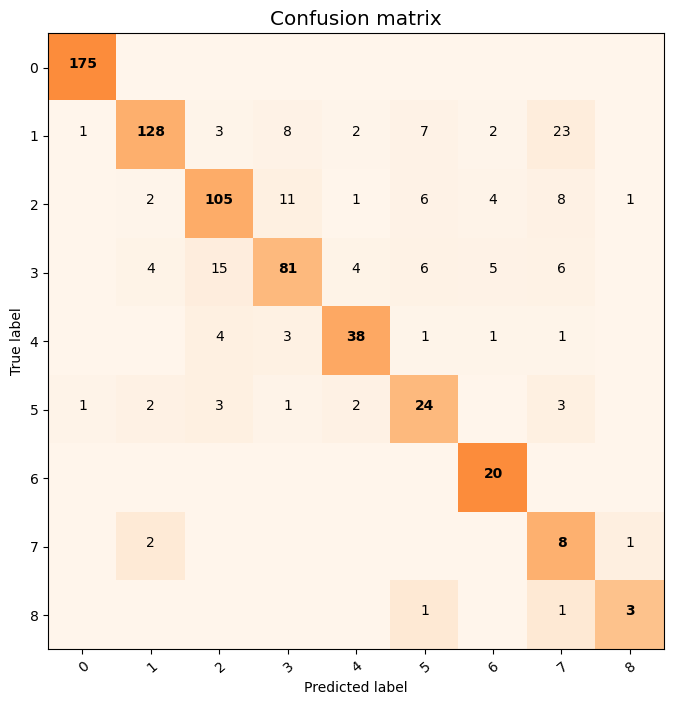

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       175
           1       0.85      0.79      0.82       162
           2       0.60      0.83      0.70       126
           3       0.48      0.76      0.59       107
           4       0.70      0.88      0.78        43
           5       0.26      0.75      0.38        32
           6       0.25      1.00      0.40        20
           7       0.06      0.80      0.11        10
           8       0.23      0.75      0.35         4

   micro avg       0.55      0.86      0.67       679
   macro avg       0.48      0.84      0.56       679
weighted avg       0.68      0.86      0.74       679
 samples avg       0.64      0.86      0.71       679



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### double

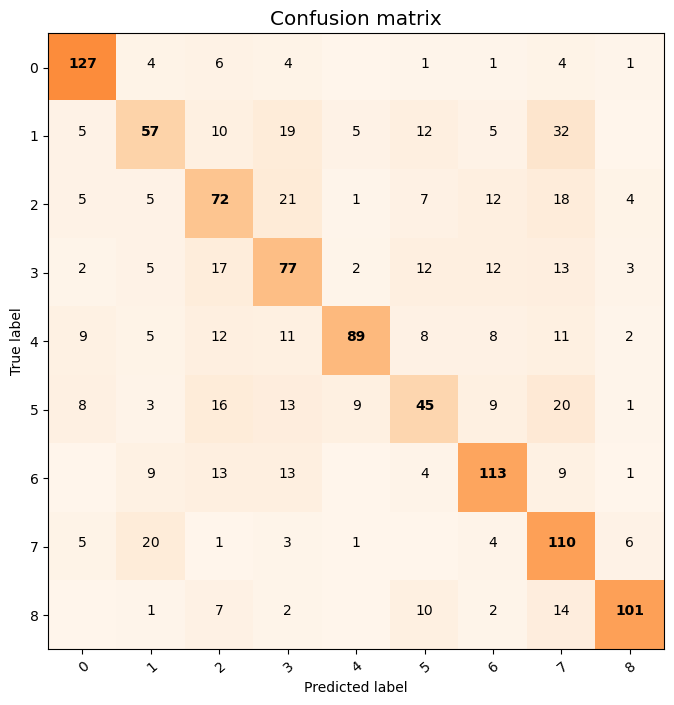

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       152
           1       0.64      0.38      0.47       152
           2       0.52      0.47      0.50       152
           3       0.48      0.51      0.50       152
           4       0.85      0.59      0.69       152
           5       0.52      0.30      0.38       152
           6       0.68      0.74      0.71       152
           7       0.50      0.72      0.59       152
           8       0.89      0.66      0.76       152

   micro avg       0.64      0.58      0.61      1368
   macro avg       0.65      0.58      0.60      1368
weighted avg       0.65      0.58      0.60      1368
 samples avg       0.67      0.58      0.60      1368



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Noise sample augmentation (4)

#### combined

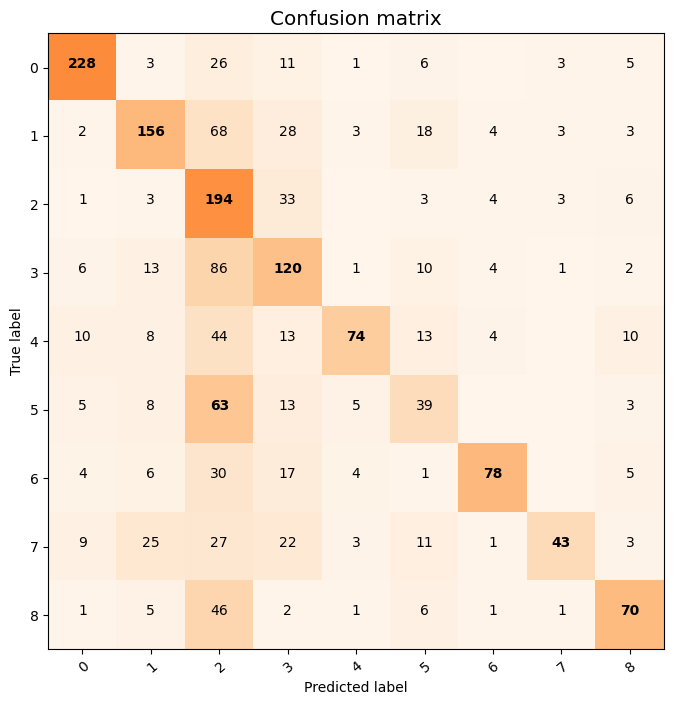

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       327
           1       0.72      0.50      0.59       314
           2       0.39      0.70      0.50       278
           3       0.51      0.46      0.48       259
           4       0.88      0.38      0.53       195
           5       0.41      0.21      0.28       184
           6       0.85      0.45      0.59       172
           7       0.81      0.27      0.40       162
           8       0.71      0.45      0.55       156

   micro avg       0.60      0.49      0.54      2047
   macro avg       0.68      0.46      0.52      2047
weighted avg       0.67      0.49      0.54      2047
 samples avg       0.65      0.56      0.58      2047



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### single

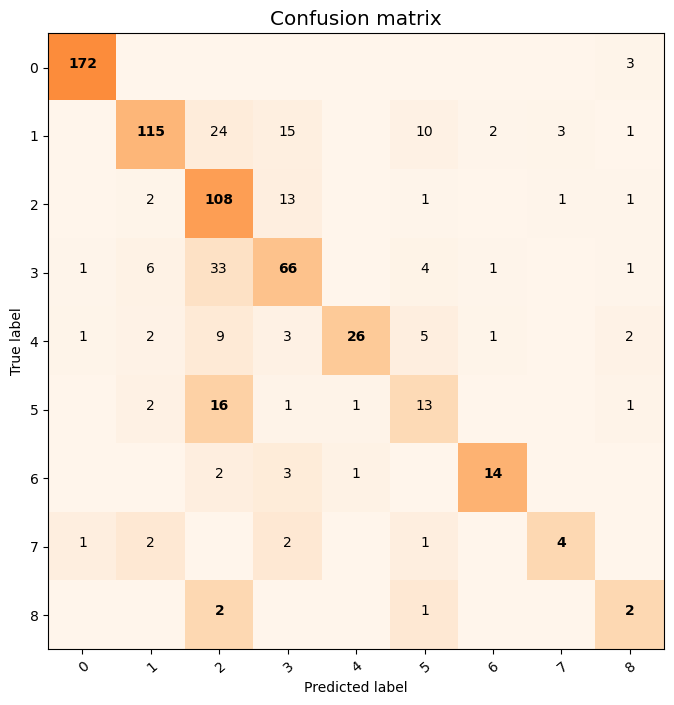

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       175
           1       0.82      0.71      0.76       162
           2       0.46      0.86      0.60       126
           3       0.53      0.62      0.57       107
           4       0.93      0.60      0.73        43
           5       0.32      0.41      0.36        32
           6       0.74      0.70      0.72        20
           7       0.44      0.40      0.42        10
           8       0.13      0.50      0.21         4

   micro avg       0.66      0.77      0.71       679
   macro avg       0.59      0.64      0.59       679
weighted avg       0.71      0.77      0.72       679
 samples avg       0.71      0.77      0.72       679



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### double

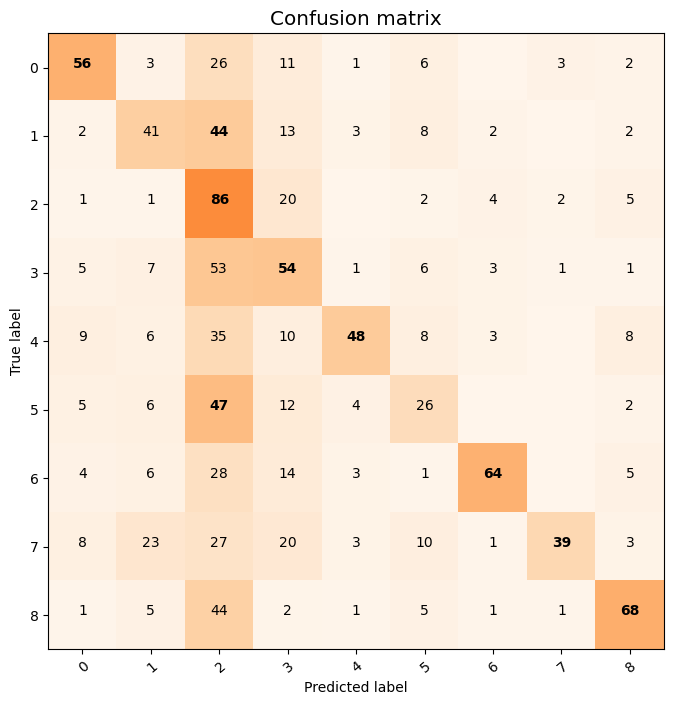

              precision    recall  f1-score   support

           0       0.58      0.37      0.45       152
           1       0.54      0.27      0.36       152
           2       0.32      0.57      0.41       152
           3       0.48      0.36      0.41       152
           4       0.86      0.32      0.46       152
           5       0.49      0.17      0.25       152
           6       0.88      0.42      0.57       152
           7       0.89      0.26      0.40       152
           8       0.81      0.45      0.58       152

   micro avg       0.56      0.35      0.43      1368
   macro avg       0.65      0.35      0.43      1368
weighted avg       0.65      0.35      0.43      1368
 samples avg       0.59      0.35      0.43      1368



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hybrid data augmentation 16 KHz (5)

#### combined

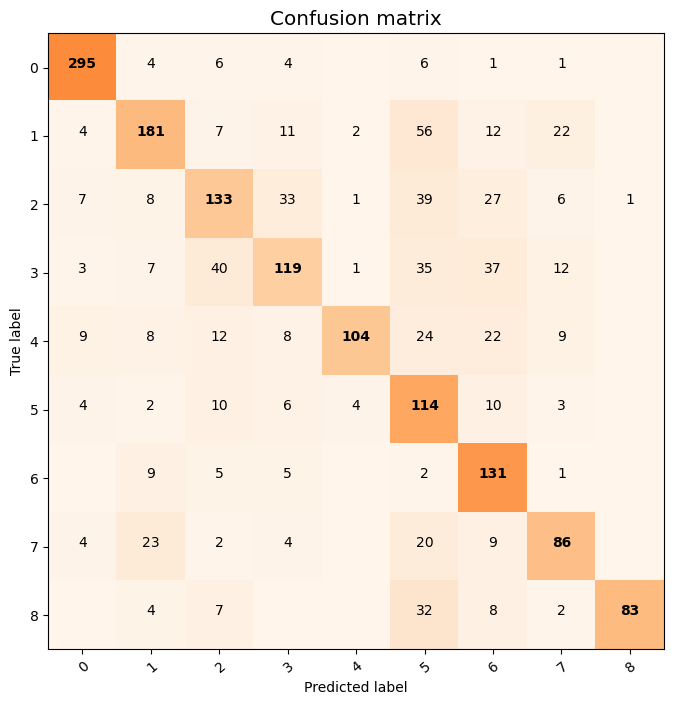

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       327
           1       0.80      0.58      0.67       314
           2       0.58      0.48      0.52       278
           3       0.59      0.46      0.52       259
           4       0.93      0.53      0.68       195
           5       0.29      0.62      0.39       184
           6       0.51      0.76      0.61       172
           7       0.56      0.53      0.55       162
           8       0.99      0.53      0.69       156

   micro avg       0.62      0.61      0.62      2047
   macro avg       0.68      0.60      0.61      2047
weighted avg       0.69      0.61      0.63      2047
 samples avg       0.65      0.65      0.63      2047



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### single

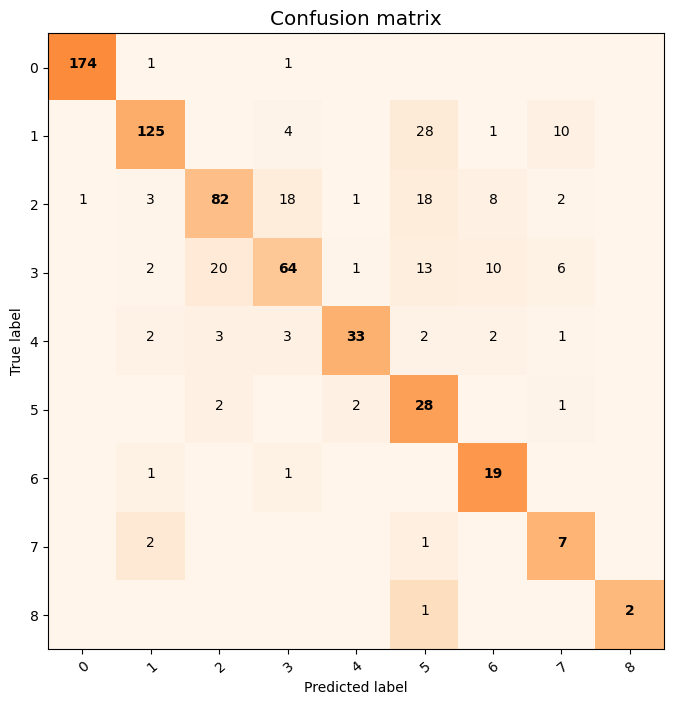

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       175
           1       0.90      0.77      0.83       162
           2       0.61      0.65      0.63       126
           3       0.55      0.60      0.57       107
           4       0.87      0.77      0.81        43
           5       0.14      0.88      0.24        32
           6       0.32      0.95      0.48        20
           7       0.19      0.70      0.30        10
           8       1.00      0.50      0.67         4

   micro avg       0.59      0.79      0.67       679
   macro avg       0.62      0.76      0.61       679
weighted avg       0.74      0.79      0.74       679
 samples avg       0.64      0.79      0.69       679



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### double

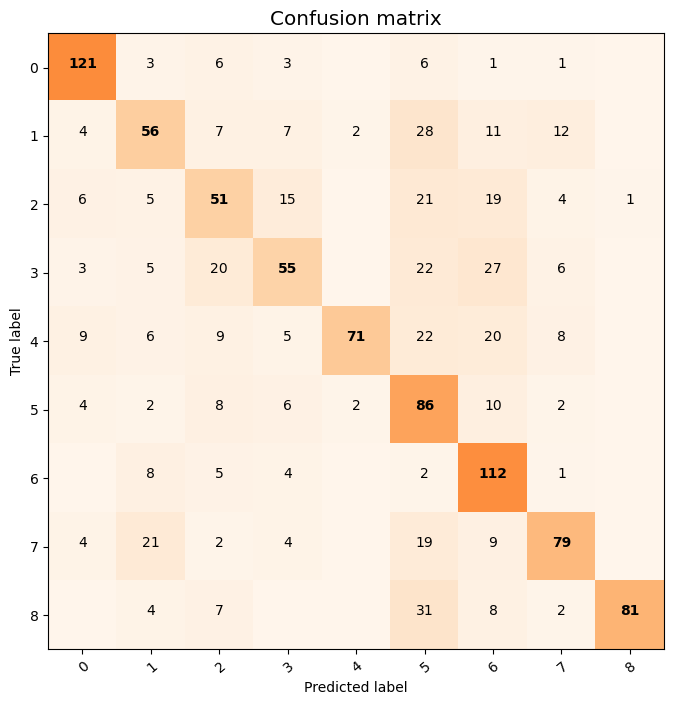

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       152
           1       0.65      0.37      0.47       152
           2       0.53      0.34      0.41       152
           3       0.63      0.36      0.46       152
           4       0.96      0.47      0.63       152
           5       0.44      0.57      0.50       152
           6       0.56      0.74      0.64       152
           7       0.68      0.52      0.59       152
           8       0.99      0.53      0.69       152

   micro avg       0.65      0.52      0.58      1368
   macro avg       0.69      0.52      0.57      1368
weighted avg       0.69      0.52      0.57      1368
 samples avg       0.66      0.52      0.56      1368



C:\Users\Max\.conda\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
for configuration in augmentation_techniques:
    # Skip if we're not training a model on this data augmentation technique
    if not hasattr(configuration.config, 'training'):
        continue
    display(IPython.display.Markdown(f'### {configuration.name} ({configuration.index})'))
    
    project_data_folder = configuration.folder
    result_dfs = {}
    for test_type in test_dfs[configuration.codebase]:
        result_dfs[test_type] = pd.read_csv(f'{configuration.folder}/results/{test_type}.csv', sep=';')
    opt_threshold = None
    for experiment_name, experiment_results in experiment_types.items():
        display(IPython.display.Markdown(f'#### {experiment_name}'))
        truth = []
        predicted = []
        for result_name in experiment_results:
            truth += list(map(json.loads, result_dfs[result_name]['true_labels']))
            predicted += list(map(json.loads, result_dfs[result_name]['predicted_logits']))
        truth = np.squeeze(truth)
        predicted = np.squeeze(predicted)[:,:9]
        
        if opt_threshold is None:
            opt_threshold = get_optimum_threshold(truth, predicted)
        
        display_confusion_matrix(truth, predicted, df_classes, opt_threshold)
        
        print(classification_report(truth, get_predictions(predicted, opt_threshold)))